<a href="https://colab.research.google.com/github/Dxmoore/Forest-Cover-Classification-with-Deep-Learning/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


###Loading Data###

#import data
data = pd.read_csv('cover_data.csv')

#view data columns and types
data.info()

# Check for NaN values in the 'class' column-- found one row with nan value 
nan_values = data['class'].isna().sum()

# Print the number of NaN values
print("Number of NaN values in 'class' column:", nan_values)

# Drop rows with NaN values in the 'class' column
data = data.dropna(subset=['class'])

#view distribution of the target column 'death event'
print('Classes and number of values in the dataset', Counter(data['class'])) 

#create variable for label and features column
y = data['class']
x = data.drop(['class'], axis = 1)




The dataset contains a great imbalance in classifications, leaning heavily towards classes 1 and 2 (Spruce/Fir
Lodgepole Pine). 

In [28]:
###Data Preprocessing###


#split the data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)


#scale the numeric training and test feature values
numerical_columns = data.select_dtypes(include=['int64']).columns
ct = ColumnTransformer([("only numeric", StandardScaler(), x.columns)], remainder='passthrough')#used x.columns since all data is in int64
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)







In [ ]:
###Create Model###


# Subtract 1 from class labels -> class lables must be zero indexed to use with sparse categorical crossentrophy
Y_train -= 1
Y_test -= 1

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)

#create model instance with input, hidden and output layers 
model = Sequential()
model.add(InputLayer(input_shape=(X_train_scaled.shape[1],))) #input
model.add(Dense(12, activation='relu')) #hidden
model.add(Dense(7, activation='softmax')) #output
# Use sparse categorical cross-entropy as the loss function
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compile model
model.fit(X_train_scaled, Y_train, epochs=100, batch_size=64, callbacks = [early_stopping]) # fit model
loss, acc = model.evaluate(X_test_scaled, Y_test)





In [ ]:
### Generate a classification report ###


y_estimate = model.predict(X_test_scaled, verbose=0)
y_estimate = np.argmax(y_estimate, axis=1)
print(classification_report(Y_test, y_estimate))


1572/1572 [==============================] - 8s 5ms/step


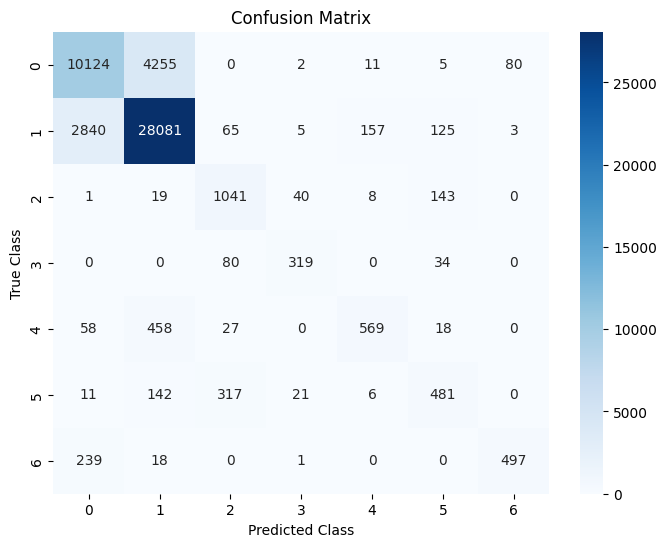

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(Y_test, y_estimate)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


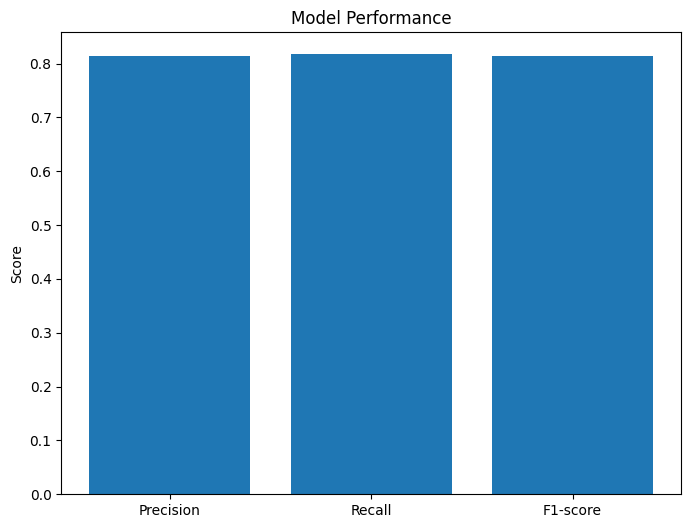

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, y_estimate, average='weighted')
recall = recall_score(Y_test, y_estimate, average='weighted')
f1 = f1_score(Y_test, y_estimate, average='weighted')

# Plot bar chart
plt.figure(figsize=(8, 6))
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]
plt.bar(metrics, scores)
plt.title("Model Performance")
plt.ylabel("Score")
plt.show()
